# Part1 - Step 1

In [779]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
#pd.set_option('expand_frame_repr', True)

r = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares')
parse = BeautifulSoup(r.text, 'html5lib')
table = parse.find('table')
htmlTableString = str(table)
result = pd.read_html(htmlTableString, header=None)[0]
result.columns = ['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time','movie']
result.index = result.index + 1
print(result.head(10))

    rank x_class        date region start_time max_time end_time  \
1      1   X28.0  2003/11/04   0486      19:29    19:53    20:06   
2      2     X20  2001/04/02   9393      21:32    21:51    22:03   
3      3   X17.2  2003/10/28   0486      09:51    11:10    11:24   
4      4   X17.0  2005/09/07   0808      17:17    17:40    18:03   
5      5   X14.4  2001/04/15   9415      13:19    13:50    13:55   
6      6   X10.0  2003/10/29   0486      20:37    20:49    21:01   
7      7    X9.4  1997/11/06      -      11:49    11:55    12:01   
8      8    X9.0  2006/12/05   0930      10:18    10:35    10:45   
9      9    X8.3  2003/11/02   0486      17:03    17:25    17:39   
10    10    X7.1  2005/01/20   0720      06:36    07:01    07:26   

                movie  
1   MovieView archive  
2   MovieView archive  
3   MovieView archive  
4   MovieView archive  
5   MovieView archive  
6   MovieView archive  
7   MovieView archive  
8   MovieView archive  
9   MovieView archive  
10  MovieVi

1. Use requests.get to get the Url.
2. Use BeautifulSoup to parse the url as HTML.
3. Find the first table in the from the HTML which is the one I needed.
4. Turned the parsed table object into string then use pd.read_html to turn it into a DataFrame.
5. Set correct headers for the DataFrame.
6. Increased the index by 1 so It starts at 1 instead of 0.
7. Print out the first 10 rows of the DataFrame.

# Part 1 - Step 2

In [780]:
import datetime 
result.drop('movie', axis=1, inplace= True)
result = result[['rank', 'x_class', 'date', 'start_time', 'max_time', 'end_time', 'region']]

for index, row in result.iterrows():
    
    start_datetime = datetime.datetime.strptime(row['date']+"-"+row['start_time'], '%Y/%m/%d-%H:%M')
    max_datetime = datetime.datetime.strptime(row['date']+"-"+row['max_time'], '%Y/%m/%d-%H:%M')
    end_datetime = datetime.datetime.strptime(row['date']+"-"+row['end_time'], '%Y/%m/%d-%H:%M')
    
    result.set_value(index, 'start_time', start_datetime)
    result.set_value(index, 'max_time', max_datetime)
    result.set_value(index, 'end_time', end_datetime)
    
new_result = result.drop('date', axis=1)
new_result.columns = ['rank', 'x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region']
new_result.replace('-',np.nan, inplace=True)
p2result = new_result
print(new_result.head(10))

    rank x_class      start_datetime        max_datetime        end_datetime  \
1      1   X28.0 2003-11-04 19:29:00 2003-11-04 19:53:00 2003-11-04 20:06:00   
2      2     X20 2001-04-02 21:32:00 2001-04-02 21:51:00 2001-04-02 22:03:00   
3      3   X17.2 2003-10-28 09:51:00 2003-10-28 11:10:00 2003-10-28 11:24:00   
4      4   X17.0 2005-09-07 17:17:00 2005-09-07 17:40:00 2005-09-07 18:03:00   
5      5   X14.4 2001-04-15 13:19:00 2001-04-15 13:50:00 2001-04-15 13:55:00   
6      6   X10.0 2003-10-29 20:37:00 2003-10-29 20:49:00 2003-10-29 21:01:00   
7      7    X9.4 1997-11-06 11:49:00 1997-11-06 11:55:00 1997-11-06 12:01:00   
8      8    X9.0 2006-12-05 10:18:00 2006-12-05 10:35:00 2006-12-05 10:45:00   
9      9    X8.3 2003-11-02 17:03:00 2003-11-02 17:25:00 2003-11-02 17:39:00   
10    10    X7.1 2005-01-20 06:36:00 2005-01-20 07:01:00 2005-01-20 07:26:00   

   region  
1    0486  
2    9393  
3    0486  
4    0808  
5    9415  
6    0486  
7     NaN  
8    0930  
9    0486  

1. Used drop to removed the last column 'movie'.
2. Moved region, making it the last column.
3. Iterate through all the rows and combining the date and time and inserting them to their correct column.
4. After date and time are combined, remove the original 'date' column.
5. Rename the column headers to appropriate names.
6. Replace non-numberic inputs with 'NaN'.

# Part1 - Step 3

In [781]:
r = requests.get('http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html')
parse = BeautifulSoup(r.text, 'html5lib')
parse_str = str(parse.find('pre').get_text())
data = parse_str.split("\n")
del data[:11]
data = data[:-3]

split_data = []
for e in data:
    e = str(e).split()
    e = e[:14]
    split_data.append(e)

result = pd.DataFrame.from_dict(split_data)
result.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 
                  'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 
                  'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed']
result.index = result.index + 1
print(result.head(10))

    start_date start_time end_date end_time start_frequency end_frequency  \
1   1997/04/01      14:00    04/01    14:15            8000          4000   
2   1997/04/07      14:30    04/07    17:30           11000          1000   
3   1997/05/12      05:15    05/14    16:00           12000            80   
4   1997/05/21      20:20    05/21    22:00            5000           500   
5   1997/09/23      21:53    09/23    22:16            6000          2000   
6   1997/11/03      05:15    11/03    12:00           14000           250   
7   1997/11/03      10:30    11/03    11:30           14000          5000   
8   1997/11/04      06:00    11/05    04:30           14000           100   
9   1997/11/06      12:20    11/07    08:30           14000           100   
10  1997/11/27      13:30    11/27    14:00           14000          7000   

   flare_location flare_region flare_classification cme_date cme_time  \
1          S25E16         8026                 M1.3    04/01    15:18   
2     

1. Use request to get the URL, then parse it using BeautifulSoup.
2. Find the 'pre' tag and convert it to a string.
3. Parse the string by each new line element, then remove the first 11 lines and the last 3 lines (Not needed).
4. Now that all the data I want is in a list format, I loop through and the split them into list of lists containing a all the data I need.
5. Use DataFrame fucntion to turn my List of lists into a DataFrame, then name the header to its proper name.
6. Increase the index by one so it starts from 1 instead of 0.

# Part 1 - Step 4

In [782]:
result.replace({'????': np.nan},inplace=True)
result.replace({'-----': np.nan},inplace=True)
result.replace({'----': np.nan},inplace=True)
result.replace({'EP': np.nan},inplace=True)
result.replace({'DIM': np.nan},inplace=True)
result.replace({'DSF': np.nan},inplace=True)
result.replace({'FILA': np.nan},inplace=True)
result.replace({'--/--': np.nan},inplace=True)
result.replace({'--:--': np.nan},inplace=True)
result.replace({'------': np.nan},inplace=True)
result.replace({'Back': np.nan},inplace=True)
result.replace({'BACK': np.nan},inplace=True)
result.replace({'---': np.nan},inplace=True)
result.replace({'EP?': np.nan},inplace=True)
result.replace({'Back?': np.nan},inplace=True)
result.replace({'altr': np.nan},inplace=True)

result['end_date'] = pd.to_datetime(result['end_date'],format="%m/%d")
result['cme_date'] = pd.to_datetime(result['cme_date'],format="%m/%d")

result['is_halo'] = 'False'
result['width_lower_bound'] = 'False'

for index, row in result.iterrows():
    if (row['cme_angle'] == 'Halo'):
        result.set_value(index,'cme_angle',np.nan)
        result.set_value(index,'is_halo','True')
    if ('>' in str(row['cme_width'])):
        result.set_value(index,'width_lower_bound','True')
        row['cme_width'] = row['cme_width'].strip('>')
    if ('24:00' in str(row['cme_time'])):
        result.set_value(index,'cme_time','00:00')
        result.set_value(index,'cme_date', row['cme_date'] + datetime.timedelta(days=1))
    if ('24:00' in str(row['end_time'])):
        result.set_value(index,'end_time','00:00')
        result.set_value(index,'end_date', row['end_date'] + datetime.timedelta(days=1))
        
for index, row in result.iterrows():
    
    year = datetime.datetime.strptime(row['start_date'],'%Y/%m/%d')
    year = year.year
    
    end = row['end_date']
    cme = row['cme_date']

    start_datetime = datetime.datetime.strptime(row['start_date']+'/'+row['start_time'], '%Y/%m/%d/%H:%M')  
    end_datetime = datetime.datetime.strptime(str(year)+'/'+str(end.month)+'/'+str(end.day)+'/'+row['end_time'], 
                                              '%Y/%m/%d/%H:%M')
    try:
        cme_datetime = datetime.datetime.strptime(str(year)+'/'+str(cme.month)+'/'+str(cme.day)+'/'+row['cme_time'],
                                                  '%Y/%m/%d/%H:%M')
    except:
        result.set_value(index, 'cme_time', np.nan)
    
    result.set_value(index, 'start_time', start_datetime)
    result.set_value(index, 'end_time', end_datetime)
    result.set_value(index, 'cme_time', cme_datetime)

new_result = result.drop(['start_date', 'end_date', 'cme_date'], axis=1)
new_result.columns = ['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location', 
                      'flare_region', 'flare_classification', 'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed', 
                      'is_halo', 'width_lower_bound']
print(new_result.head(6))

        start_datetime         end_datetime start_frequency end_frequency  \
1  1997-04-01 14:00:00  1997-04-01 14:15:00            8000          4000   
2  1997-04-07 14:30:00  1997-04-07 17:30:00           11000          1000   
3  1997-05-12 05:15:00  1997-05-14 16:00:00           12000            80   
4  1997-05-21 20:20:00  1997-05-21 22:00:00            5000           500   
5  1997-09-23 21:53:00  1997-09-23 22:16:00            6000          2000   
6  1997-11-03 05:15:00  1997-11-03 12:00:00           14000           250   

  flare_location flare_region flare_classification         cme_datetime  \
1         S25E16         8026                 M1.3  1997-04-01 15:18:00   
2         S28E19         8027                 C6.8  1997-04-07 14:27:00   
3         N21W08         8038                 C1.3  1997-05-12 05:30:00   
4         N05W12         8040                 M1.3  1997-05-21 21:00:00   
5         S29E25         8088                 C1.4  1997-09-23 22:02:00   
6         

1. Replace all missing entries with 'NaN' using the replace fucntion.
2. Change the type of 'end_date' and 'cme_date' to datetime.
3. Create new columns named 'is_halo' and 'width_lower_bound and set all entries to False.
4. Loop through all the rows to check if 'cme_angle' is halo, if so change it to 'NaN' and set 'is_halo' to True.
5. Check if cme_width is lower bound, if so remove '>' and set 'width_lower_bound' to True.
6. Check 'end_time' and "cme_time' to see if they are '24:00' if so change them to '00:00' and add one day to the date.
7. Loop through the rows again to combine all the date and time.
8. Drop unnecessary columns and rename all the headers to correct name.

# Part 2 - Question 1

In [783]:
rep_table = new_result.loc[new_result['flare_classification'] != np.nan].copy()
rep_table['letter'] = rep_table['flare_classification'].str[0:1]
rep_table['number'] = rep_table['flare_classification'].str[1:]
rep_table['number'] = rep_table['number'].astype(float)

rep_table.sort_values(['letter', 'number'], ascending=[False,False], inplace=True)

for index, row in rep_table.iterrows():
    if ((not row['letter'] == np.nan) and (not row['number'] == np.nan)):
        rep_table.set_value(index, 'flare_classification', (str(row['letter'])+str(row['number'])))
    
for index, row in rep_table.iterrows():
    try:
        int(row['flare_region'])
        if (int(row['flare_region']) > 9999):
            rep_table.set_value(index, 'flare_region', row['flare_region'][-4:])
    except:
        pass

#copy for question 3 plot
NASA_Plot = rep_table.copy()    

rep_table = rep_table.drop(['start_frequency','end_frequency','flare_location',
                'cme_angle','cme_width','cme_speed','is_halo','width_lower_bound','letter','number'], axis=1)

rep_table = rep_table[['flare_classification', 'start_datetime', 'cme_datetime', 'end_datetime','flare_region']]
rep_table.columns = ['x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region']

rep_table['start_datetime'] =  pd.to_datetime(rep_table['start_datetime'], format='%Y-%m-%d %H-%M-%S')
rep_table['max_datetime'] =  pd.to_datetime(rep_table['max_datetime'], format='%Y-%m-%d %H-%M-%S')
rep_table['end_datetime'] =  pd.to_datetime(rep_table['end_datetime'], format='%Y-%m-%d %H-%M-%S')

rep_table.reset_index(drop=True, inplace=True)
rep_table.index = rep_table.index + 1
print(rep_table.head(50))

   x_class      start_datetime        max_datetime        end_datetime region
1    X28.0 2003-11-04 20:00:00 2003-11-04 19:54:00 2003-11-05 00:00:00   0486
2    X20.0 2001-04-02 22:05:00 2001-04-02 22:06:00 2001-04-03 02:30:00   9393
3    X17.0 2003-10-28 11:10:00 2003-10-28 11:30:00 2003-10-30 00:00:00   0486
4    X14.0 2001-04-15 14:05:00 2001-04-15 14:06:00 2001-04-16 13:00:00   9415
5    X10.0 2003-10-29 20:55:00 2003-10-29 20:54:00 2003-10-30 00:00:00   0486
6     X9.4 1997-11-06 12:20:00 1997-11-06 12:10:00 1997-11-07 08:30:00   8100
7     X9.0 2006-12-05 10:50:00 2006-11-06 17:54:00 2006-12-05 20:00:00   0930
8     X8.3 2003-11-02 17:30:00 2003-11-02 17:30:00 2003-11-03 01:00:00   0486
9     X7.1 2005-01-20 07:15:00 2005-01-20 06:54:00 2005-01-20 16:30:00   0720
10    X6.9 2011-08-09 08:20:00 2011-08-09 08:12:00 2011-08-09 08:35:00   1263
11    X6.5 2006-12-06 19:00:00 2006-11-06 17:54:00 2006-12-09 00:00:00   0930
12    X6.2 2005-09-09 19:45:00 2005-09-09 19:48:00 2005-09-09 22

With the information from NASA I was able to create a table that looks similar to the one on 'SpaceWeatherLive.com' but not exactly. It seem that the data from NASA is missing some infromatinos that 'SpaceWeatherLive.com' has. Also that a lot of the start, max, and end time does not match up exactly. Lastly some of the classification on NASA are not as exact as the ones on 'SpaceWeatherLive.com' since NASA seems to drop off digits if it make the string longer than 4 characters.

# Part 2 - Question 2

In [784]:
def findMatch(df1, df2):
    merged = pd.merge(df1, df2, left_on=['region','x_class'], right_on=['region','x_class'])
    
    for index, row in merged.iterrows():
        
        start_diff = abs(row['start_datetime_x'] - row['start_datetime_y'])/np.timedelta64(1, 's')
        max_diff = abs(row['max_datetime_x'] - row['max_datetime_y'])/np.timedelta64(1, 's')
        end_diff = abs(row['end_datetime_x'] - row['end_datetime_y'])/np.timedelta64(1, 's')
        
        if (start_diff > 3600*4 ):
            merged.drop(index, inplace=True)
        elif (max_diff > 3600*4 ):
            merged.drop(index, inplace=True)
        elif (end_diff > 3600*4 ):
            merged.drop(index, inplace=True)
    
    result = merged.drop(['start_datetime_y', 'max_datetime_y', 'end_datetime_y'], axis=1)
    
    return result

result = findMatch(p2result,rep_table)
result.reset_index(drop=True, inplace=True)
result.index = result.index+1
print(result)

    rank x_class    start_datetime_x      max_datetime_x      end_datetime_x  \
1      1   X28.0 2003-11-04 19:29:00 2003-11-04 19:53:00 2003-11-04 20:06:00   
2      6   X10.0 2003-10-29 20:37:00 2003-10-29 20:49:00 2003-10-29 21:01:00   
3     11    X6.9 2011-08-09 07:48:00 2011-08-09 08:05:00 2011-08-09 08:08:00   
4     13    X6.2 2005-09-09 19:13:00 2005-09-09 20:04:00 2005-09-09 20:36:00   
5     23    X4.8 2002-07-23 00:18:00 2002-07-23 00:35:00 2002-07-23 00:47:00   
6     24    X4.0 2000-11-26 16:34:00 2000-11-26 16:48:00 2000-11-26 16:56:00   
7     26    X3.9 2003-11-03 09:43:00 2003-11-03 09:55:00 2003-11-03 10:19:00   
8     27    X3.8 2005-01-17 06:59:00 2005-01-17 09:52:00 2005-01-17 10:07:00   
9     37    X3.2 2013-05-14 00:00:00 2013-05-14 01:11:00 2013-05-14 01:20:00   
10    39    X3.1 2002-08-24 00:49:00 2002-08-24 01:12:00 2002-08-24 01:31:00   
11    43    X2.8 2013-05-13 15:48:00 2013-05-13 16:05:00 2013-05-13 16:16:00   
12    45    X2.7 2003-11-03 01:09:00 200

First I merged the two DataFrame based on their region and classification.  
Then I compare the differene between the start, max and end time.  
If the differnece between the time is within 4 hours then I consider it a match, sicne I relized that there might be a slight variation for when they observed the events.

# Part 2 - Question 3

a) This graph is intended to find out whether there exists a correlation between flares beimg in the top 50 and also beign halo.

In [785]:
import matplotlib.pyplot as plt

NASA_Plot = NASA_Plot.drop(['letter','number'], axis=1)
NASA_Plot=NASA_Plot.rename(columns = {'cme_datetime':'max_datetime'})
NASA_Plot=NASA_Plot.rename(columns = {'flare_region':'region'})
NASA_Plot=NASA_Plot.rename(columns = {'flare_classification':'x_class'})

NASA_Plot['start_datetime'] =  pd.to_datetime(NASA_Plot['start_datetime'], format='%Y-%m-%d %H-%M-%S')
NASA_Plot['max_datetime'] =  pd.to_datetime(NASA_Plot['max_datetime'], format='%Y-%m-%d %H-%M-%S')
NASA_Plot['end_datetime'] =  pd.to_datetime(NASA_Plot['end_datetime'], format='%Y-%m-%d %H-%M-%S')

Top50_merged = findMatch(p2result, NASA_Plot)

In [786]:
Top50_isHalo = 0;
Top50_entries = len(Top50_merged.index)
for index, row in Top50_merged.iterrows():
    if (row['is_halo'] == "True"):
        Top50_isHalo += 1
    
Top50_percent_halo = round(((Top50_isHalo/Top50_entries)*100), 2)

In [787]:
NASA_isHalo = 0;
NASA_entries = len(NASA_Plot.index)

for index, row in NASA_Plot.iterrows():
    if (row['is_halo'] == "True"):
        NASA_isHalo += 1

NASA_percent_halo = round(((NASA_isHalo/NASA_entries)*100),2)     

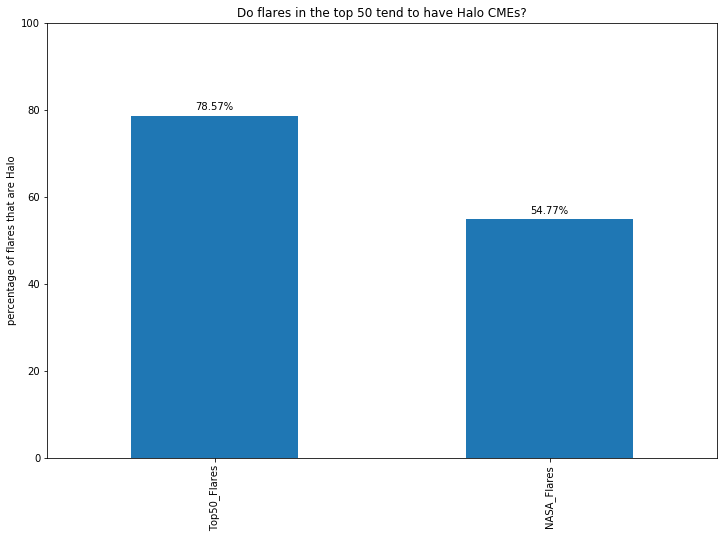

In [788]:
Flares = ['Top50_Flares', 'NASA_Flares']
plotData = {'percentage' : [Top50_percent_halo,NASA_percent_halo]}
plotData = pd.DataFrame(plotData, index=Flares)

plt.figure(figsize=(12, 8))
plt.ylim([0,100])
ax = plotData.percentage.plot(kind='bar')
ax.set_title("Do flares in the top 50 tend to have Halo CMEs?")
ax.set_ylabel("percentage of flares that are Halo")
rects = ax.patches
labels = [str(Top50_percent_halo)+'%',str(NASA_percent_halo)+'%']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+1 , label, ha='center', va='bottom')

plt.show()

c) The bar graph show the percentage of flares in the top 50 list that are halo flares and the percentage of flares in the entire NASA data that are halo flares.

d) From the graph produced by the data sets, it seems like when a flare is in the top 50 list there is a very high chance(78.57%) that is it a halo flare.  